## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


/opt/anaconda3/lib/python3.12/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




---------------
## Introductoin to Machine Learning - Day12 HW

Your job is to play around with K-nearest neighbors!

### Part 1 - build a model

1. Get the Avocado Ripeness data from [https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset](https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset)
2. Discuss the data - who owns it, what is the license, what are the features (variables)?
3. Do some basic analysis: describe for numerical data, value_counts for categorical data and pairplot for a visualization.
    * Write about your observations of the data. Include things like: NaNs, Outliers, Balance in categories.
    * What do you learn from looking at the pairplot colored by (hue='ripeness' vs hue='color_category'). Do some of the features seem like they are good predictors for classifying color or ripeness? Does it seam reasonable that you can classify ripeness or color based on the other variables? Does it seem easier to classify ripeness or color?
4. Do a Train-Test split on the data.
5. Using all of the numerical features as your data columns  and train a KNN model. You choose number of neighbors!
6. Test your model accuracy using the test set. How did you do? For me this resulted in 92% accuracy - if I used 1 neighbor)


### Part 2 - play around with the model - aka tune.

Even though we don't have a validation set, lets use the test set to try to tune the model. This means changing things to see if you can make your model better or worse. Here are some ideas:
* How many neighbors gives you the best results? Does it always help to increase the number of neighbors? Try plotting the number of neighbors vs accuracy for a bunch of tests. I did this in a for loop: training the model and saving the accuracy for 1, 2, 3, ... 20 neighbors.
* Test how many features (variables) you actually need to get a good prediction. Try a few of the ones that seem really good based on the pair plot. What is the minimum number of features you can use to get really good accuracy?

Please write up your conclusions.

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day12 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

# Part 1
## 1. Get the Avocado Ripenes

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/jesusplascencia/.cache/kagglehub/datasets/amldvvs/avocado-ripeness-classification-dataset/versions/1


In [7]:
path1 = path+'/'
file = path1+'/'+os.listdir(path)[0]
df = pd.read_csv(file)
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


## 2. Discuss the data - who owns it, what is the license, what are the features (variables)?

This dataset is licensed by Apache 2.0. We should expect it to never be updated upon its release and it is owned by Amal Dev. This Avocado dataset simulated labratory measurements of Hass avocados, their ripeness, firmness, hue, brightness, saturation, other variables. There are also 250 entries.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
 9   outlier         250 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 18.0+ KB


## 3. Do some basic analysis: describe for numerical data, value_counts for categorical data and pairplot for a visualization.
    * Write about your observations of the data. Include things like: NaNs, Outliers, Balance in categories.
    * What do you learn from looking at the pairplot colored by (hue='ripeness' vs hue='color_category'). Do some of the features seem like they are good predictors for classifying color or ripeness? Does it seam reasonable that you can classify ripeness or color based on the other variables? Does it seem easier to classify ripeness or color?

There are 9 unique columns with 250 observations. There appears to be two categorical values while the others are floats/integers. There also appears to be no NaN values and counts are consistent for each variable. When doing machine learning, Balance is of upmost importance. As I mentioned earlier, all variabls have 250 observations, and it does not seem like data is leftward / rightward skewed. 

When doing an outlier detection I noted visually that saturation is the relatively scattered. I used a outlier detection function and noted no outliers. When loooking at the hue "ripeness" I saw that firmness, sound, and weight, make sharp distinctions between the different levels of 'ripeness'. Variables such as brightness make seem have overlapping ripeness. When looking at the color_category, we get a similar story. Hue, firmness, sound, and size seem to be the best predictors for color birghtness. Overall, all the variables are relatively good predictors for ripeness, or color_category. I find it easier to classify ripeness because it is something easy to understand and explain. In other words, its more natural to predict ripeness based on other factors. Color, seems intuitive; however, I find color, brightness, hue, and saturation extremely similar. 

In [15]:
df.shape 

(250, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [29]:
df.isna().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [31]:
df.describe() #I found the 25 and 75 percentile of observations to be 

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


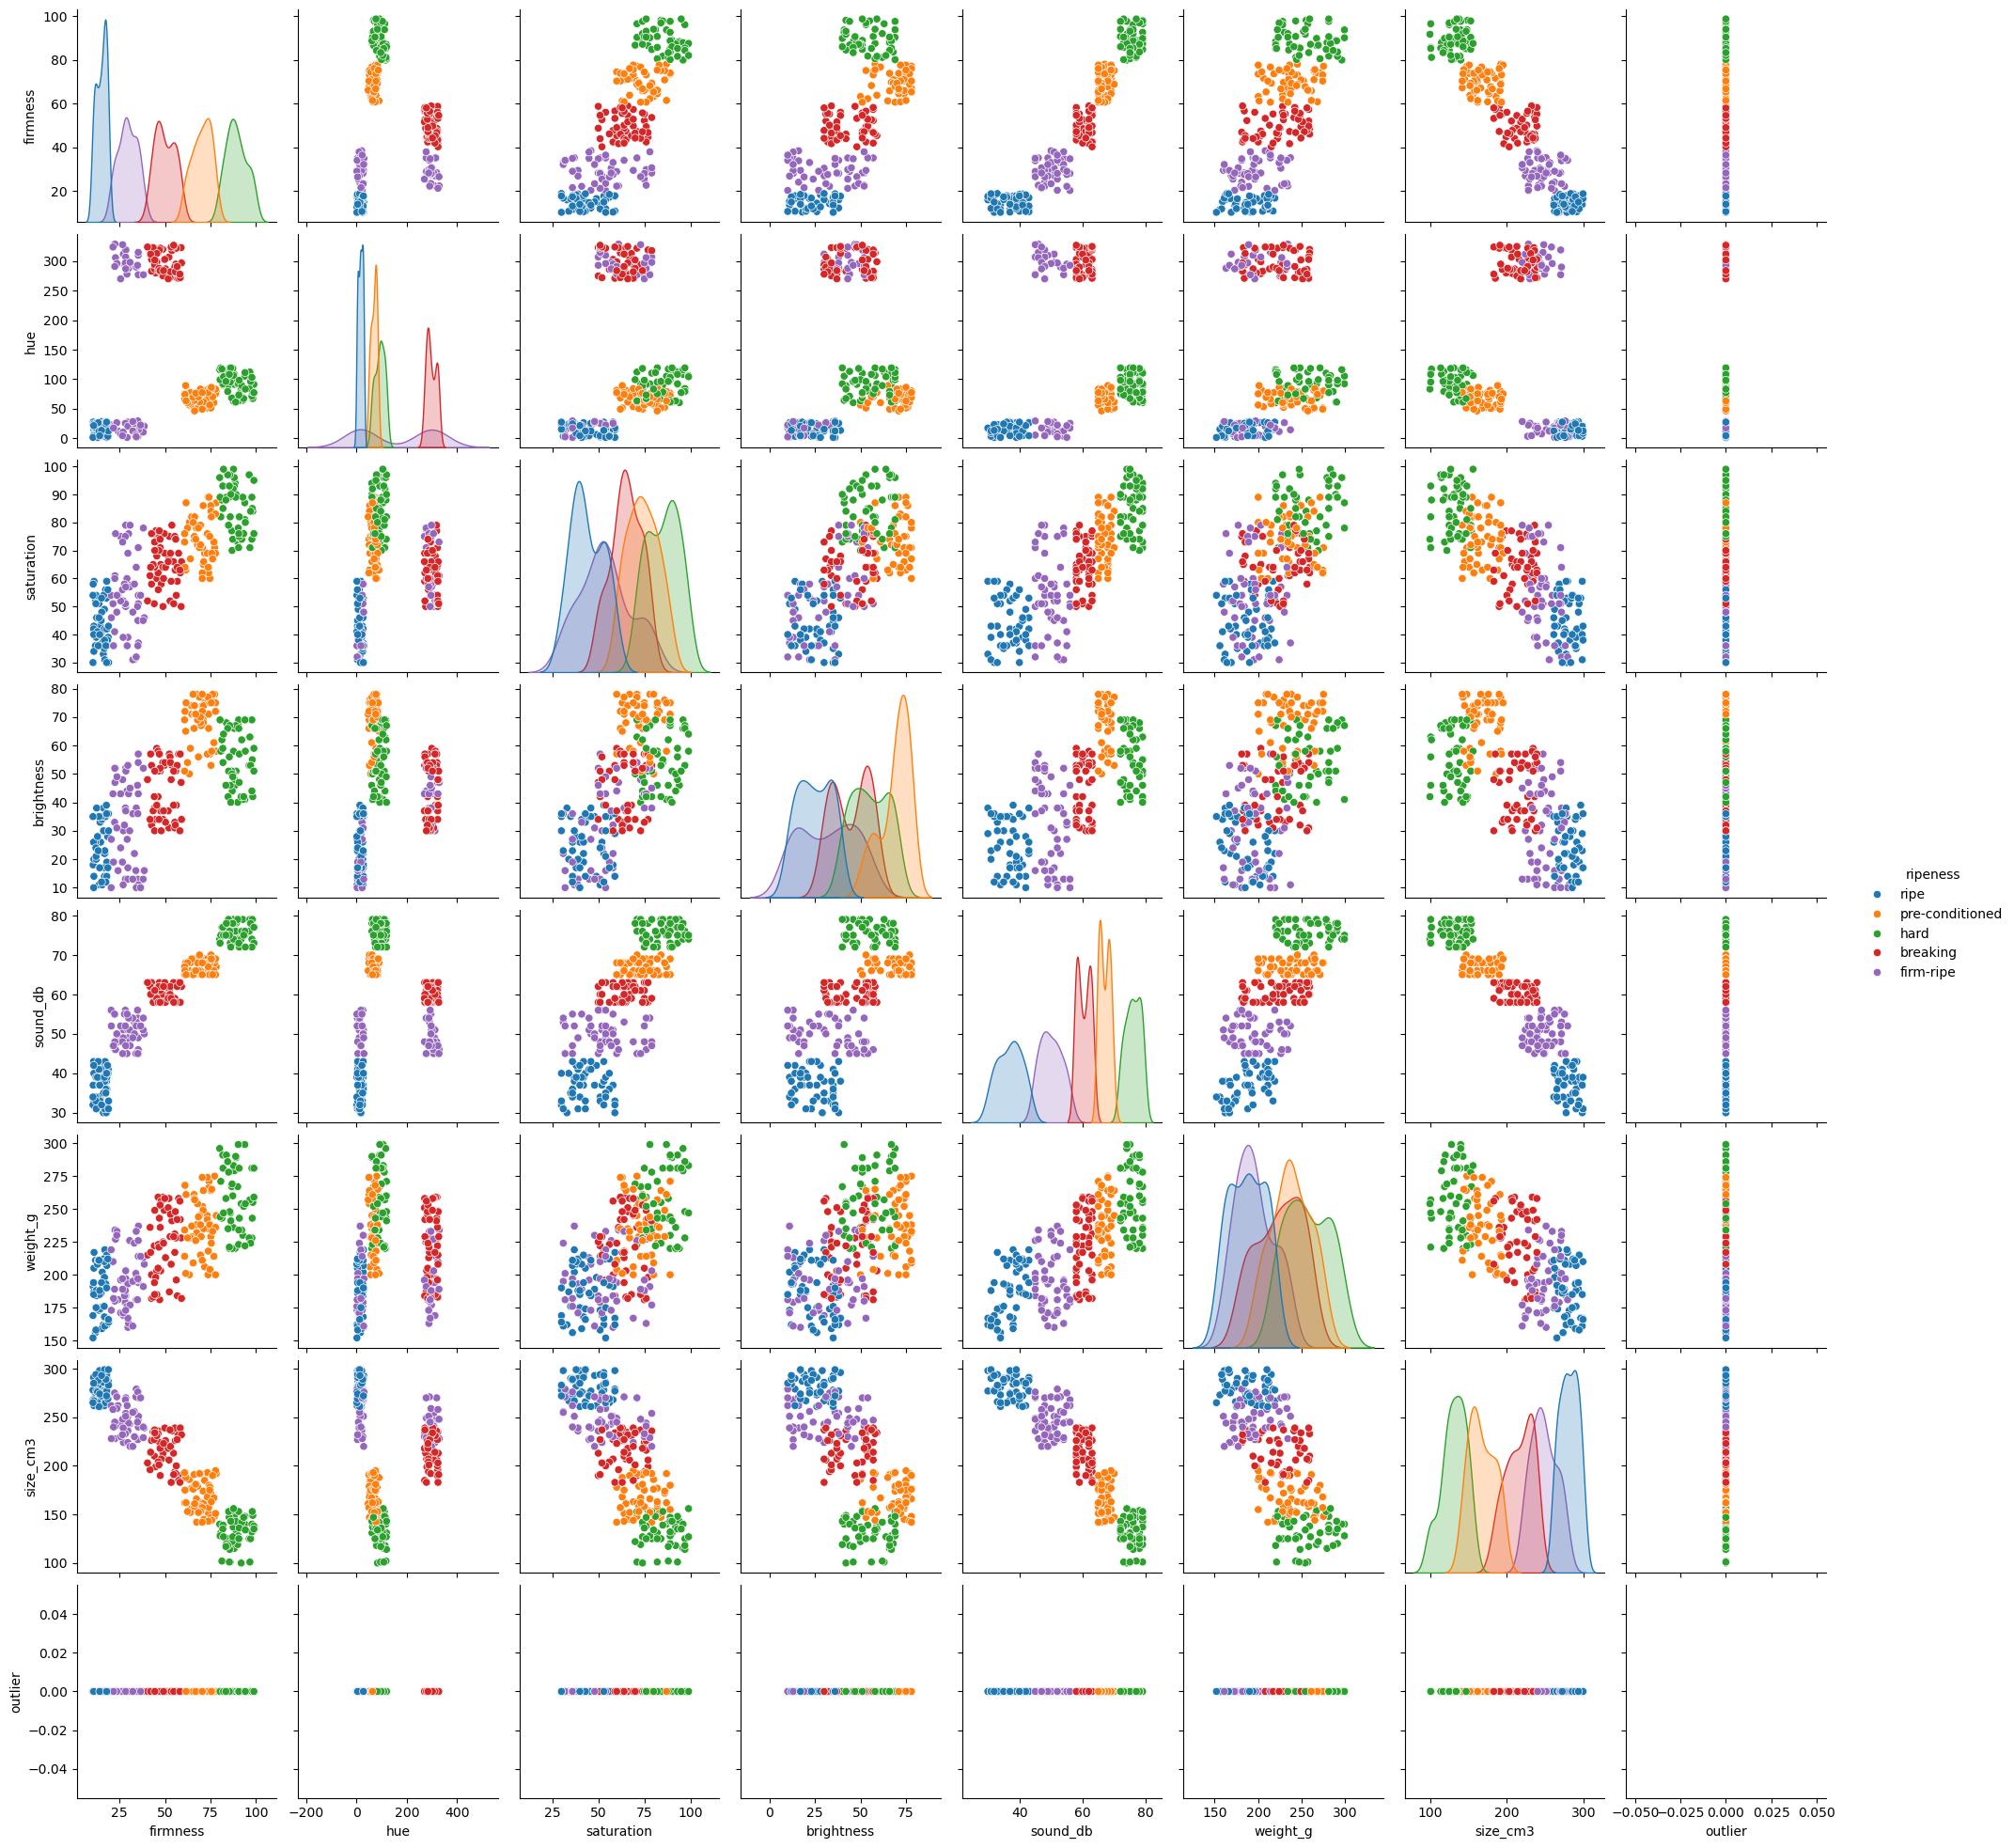

In [61]:
sns.pairplot(df, hue = 'ripeness')

In [47]:
df.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

In [50]:
# Outlier Detection 
def check_outlier(x, q1 = df['saturation'].quantile(0.25),q3 = df['saturation'].quantile(0.75)): 
    ''' This function calculates quartiles specifically for duration movies and the applies it to an outlier checker based on the IQR '''
   # q1 = data.quantile(0.25)
  #  q3 = data.quantile(0.75)

    IQR = q3 - q1
    # Determine bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    if x>upper_bound:
        return True
    elif x<lower_bound:
        return True
    else:
        return False


In [58]:
df['outlier']= df['saturation'].map(check_outlier)
df['outlier'].value_counts() # No outliers came back positive for Saturation


outlier
False    250
Name: count, dtype: int64

## 4. Do a Train-Test split on the data.

Love the test analogy when it comes to test training and splitting for ML models. It is so intuitive and makes ML easy to remember, Thank you!

In [76]:
from sklearn.model_selection import train_test_split

data_cols = ['firmness', 'hue', 'sound_db',
       'saturation','brightness','weight_g',]
target_cols = ['ripeness']

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(df[data_cols],
                                                    df[target_cols], 
                                                    test_size=0.20, 
                                                    random_state=random_seed)

In [80]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 6)
y_train shape: (200, 1)
X_test shape: (50, 6)
y_test shape: (50, 1)


##### When doing the KNN model, I was not correctly specifying the model. I was instructed to change the shape of y_shape and x_train so I found the .ravel() function. Essentially, .Ravel() turns a 2d column vector to 1 dimensional which is what the model prefers.  

In [102]:
y_train = y_train.values.ravel()# I got this from ChatGPT
y_test = y_test.values.ravel()

#### Defining the KNN Model

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


#### Training the KNN Model

In [104]:
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Now that my model is trained I can try a prediction to see if it gives me an answer. 

Recall data_cols = ['firmness', 'hue', 'sound_db','saturation','brightness','weight_g',] is my X_Trained

In [140]:
#creating a new pd DF
X_new = pd.DataFrame([[14.5, 19, 34, 40, 26, 175]],columns=X_train.columns)
print("X_new.shape:", X_new.shape)


X_new.shape: (1, 6)


In [142]:
Should be Ripe
prediction = knn.predict(X_new)
print("Prediction:", prediction)


Prediction: ['ripe']


#### Predicted results Below

In [145]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 ['pre-conditioned' 'firm-ripe' 'firm-ripe' 'firm-ripe' 'pre-conditioned'
 'hard' 'breaking' 'hard' 'pre-conditioned' 'pre-conditioned'
 'pre-conditioned' 'firm-ripe' 'breaking' 'breaking' 'breaking' 'ripe'
 'ripe' 'hard' 'ripe' 'ripe' 'ripe' 'firm-ripe' 'firm-ripe'
 'pre-conditioned' 'firm-ripe' 'ripe' 'hard' 'breaking' 'breaking'
 'breaking' 'firm-ripe' 'firm-ripe' 'firm-ripe' 'breaking' 'ripe'
 'breaking' 'hard' 'ripe' 'ripe' 'ripe' 'ripe' 'ripe' 'breaking'
 'firm-ripe' 'ripe' 'pre-conditioned' 'hard' 'firm-ripe' 'hard' 'hard']


#### Actual results Below

In [148]:
y_test

array(['pre-conditioned', 'breaking', 'firm-ripe', 'breaking',
       'pre-conditioned', 'hard', 'breaking', 'hard', 'pre-conditioned',
       'pre-conditioned', 'pre-conditioned', 'firm-ripe', 'breaking',
       'breaking', 'breaking', 'ripe', 'ripe', 'hard', 'ripe', 'ripe',
       'ripe', 'breaking', 'firm-ripe', 'pre-conditioned', 'firm-ripe',
       'ripe', 'hard', 'breaking', 'breaking', 'breaking', 'firm-ripe',
       'firm-ripe', 'firm-ripe', 'breaking', 'ripe', 'breaking', 'hard',
       'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'breaking', 'firm-ripe',
       'ripe', 'pre-conditioned', 'hard', 'firm-ripe', 'hard', 'hard'],
      dtype=object)

#### I used n = 1 neighbors and got an accuracy score of 0.94. Overall, this is a very good accuracy score.

In [171]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.94


# Part 2 --> Tuning 

### Choosing the right number of features 

#### By looking at the sns.pairplot() I was able to look at our hue = ripeness and quickly identify features that had sharp distinctions between ripeness levels. Instead of having 6 features, I decided to use the 3 features that clearly distinguish between levels of ripeness. Features such as firmness, sound, and size clearly make this distinction. When only using these three features we get a great model that has an accuracy score of 1. This means that we can be certain that firmness, sound, and size of the avocado accurately predict the ripeness. This also means that no further specifying needs to be done because we already achieved a test score of 1. 

In [190]:
data_cols2 = ['firmness', 'sound_db','size_cm3']
target_cols = ['ripeness']

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(df[data_cols2],
                                                    df[target_cols], 
                                                    test_size=0.20, 
                                                    random_state=random_seed)

In [192]:
y_train = y_train.values.ravel()# I got this from ChatGPT
y_test = y_test.values.ravel()

In [210]:
knn = KNeighborsClassifier(n_neighbors=1)

In [212]:
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [214]:
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


In [216]:
df.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness', 'outlier'],
      dtype='object')

### Does more neighbors help?

#### There seems to be an exponetial decrease in our test set score when we increase the number of neighbors. At 1 neighbor we get an accuracy score of 1, when we have 10 neighbors we get an test set score of 0.98, and when we have 100 neighbors we get a test set score of 0.36. Clearly, more neighbors does not result in a more robust model, infact, the opposite is true. To see this, we can visualize the number of numbers and the given test score. We can clearly observe that after 42 neighbors we experience an exponential drop in model test scores. The optimal number of neighbors seems to be from 1 to 5. 

In [229]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.36


[]

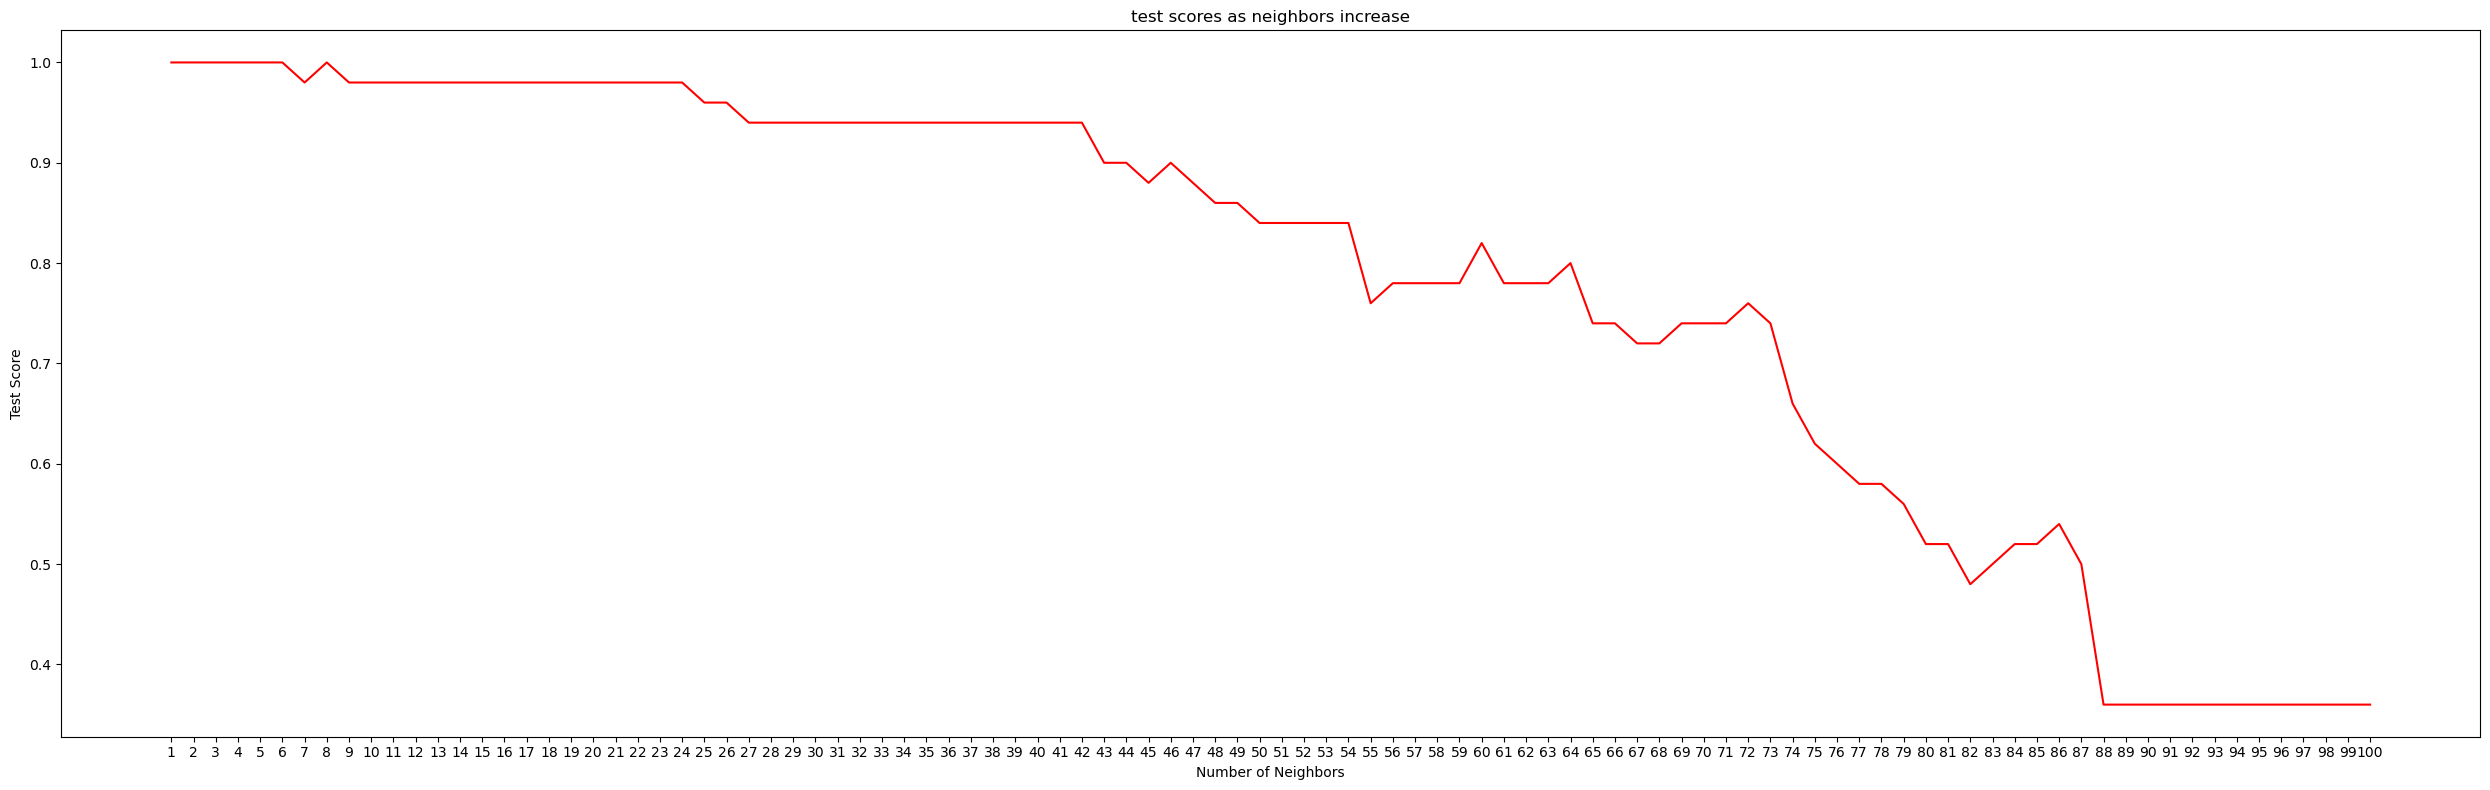

In [281]:
k_val = range(1,101)
test_score = []
for i in k_val:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = np.mean(y_pred == y_test)
    test_score.append(score)

plt.figure(figsize = (25,8))
plt.plot(k_val, test_score, color = 'red')
plt.title('test scores as neighbors increase')
plt.ylabel('Test Score')
plt.xlabel('Number of Neighbors')
plt.xticks(k_val)
plt.tight_layout()
plt.plot()
